In [25]:
import cv2
import numpy as np
import json
from PIL import Image

from torchvision import transforms

import matplotlib.pyplot as plt

In [10]:
def resize_image(image, resize_to, output_type='numpy', interpolation=transforms.InterpolationMode.BILINEAR, antialias=True):
    """
    return: Resized image in the specified format.

    resize_to: Tuple (width, height) to resize the image to.
    output_type: Specify 'PIL', 'numpy', or 'tensor' for the output format.
    interpolation: Interpolation mode to use for resizing.
    antialias: Whether to apply antialiasing
    """
    # 1. Define & apply the transformation
    resize_transform = transforms.Resize(size=resize_to, interpolation=interpolation, antialias=antialias)
    resized_image = resize_transform(image)

    # 2. Convert to the desired output type
    if output_type == 'numpy':
        return np.array(resized_image)  
    elif output_type == 'tensor':
        return transforms.ToTensor()(resized_image)  
    else:
        return resized_image  

In [16]:
# 1. Read the image and resize
image = cv2.imread('potholes0.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
image_pil = Image.fromarray(image_rgb)              # Convert to PIL Image

image_resized = resize_image(image_pil, (252, 252))

# 2. Read proposals from json
with open('selective_search_proposals.json', 'r') as f:
    selective = json.load(f)

with open('edge_box_proposals.json', 'r') as f:
    edge_boxes = json.load(f)

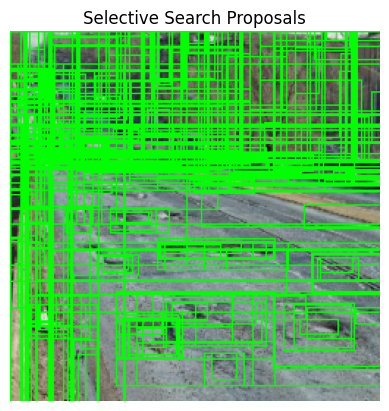

In [26]:
# 3. Plot potholes0.png
image_copy = image_resized.copy()
for box in selective['potholes0.png']:
    x1 = int(box['x_min'])
    y1 = int(box['y_min'])
    x2 = int(box['x_max'])
    y2 = int(box['y_max'])
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2.imshow('Selective Search Proposals', image_copy)

plt.imshow(image_copy)
plt.title('Selective Search Proposals')
plt.axis('off')
plt.show()

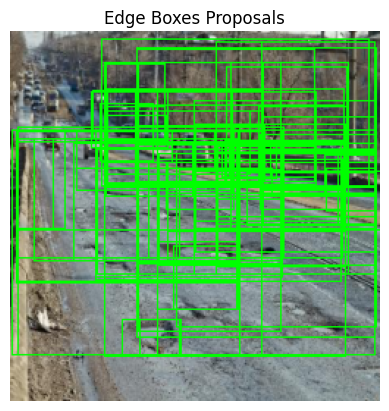

In [28]:
# 4. Plot edge_boxes proposals
image_copy = image_resized.copy()
for box in edge_boxes['potholes0.png'][:100]:
    x1 = int(box['x_min'])
    y1 = int(box['y_min'])
    x2 = int(box['x_max'])
    y2 = int(box['y_max'])
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2.imshow('Edge Boxes Proposals', image_copy)

plt.imshow(image_copy)
plt.title('Edge Boxes Proposals')
plt.axis('off')
plt.show()